## Anova Oneway
Analysis of Variance

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

step # 2 load datset

In [2]:
kashti=sns.load_dataset("titanic")
kashti.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

step # 3 Comparison of the variables

<AxesSubplot:xlabel='sex', ylabel='age'>

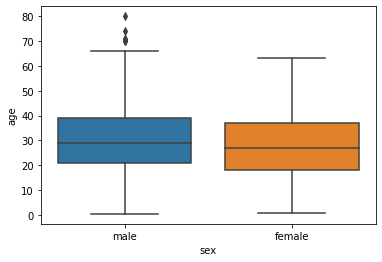

In [3]:
sns.boxplot(x="sex",y="age",data=kashti)# comparison between two categorical variable for one continuous

step # 4 comparison of the classes of the numerical variable "age

<AxesSubplot:xlabel='class', ylabel='age'>

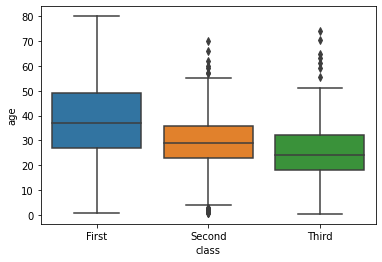

In [4]:
sns.boxplot(x="class",y="age",data=kashti) # Anova

step # 5 Example of the phool dataset

In [5]:

phool=sns.load_dataset("Iris")
phool.head()





sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Step:6 Checking the columns of the dataset

In [6]:
phool.sample(15)
phool.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Step -7 Description of the datset

In [7]:
phool.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

step-8 create a boxplot of one specie sepal length

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

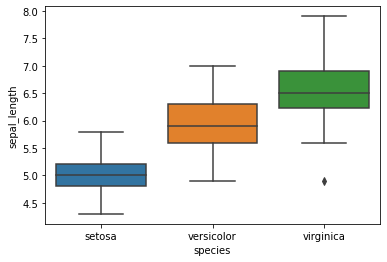

In [8]:
sns.boxplot(x="species",y="sepal_length",data=phool)

In [9]:
from scipy.stats import shapiro
stat, p = shapiro(phool["sepal_length"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for further use
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else:
    print('Probably not Gaussian nor Normal Distribution')


Statistics=0.976, p=0.010
Probably not Gaussian nor Normal Distribution


In [10]:
# Stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Perform One Way Anova over phool dataset

In [11]:
model=ols("sepal_length ~ species",data=phool).fit()

aov_table=sm.stats.anova_lm(model,type=2)
print(aov_table)


             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


#  pairwise comparison of the model#

In [ ]:

pair_t=model.t_test_pairwise( "species",method='bonferroni')
pair_t.result_frame

In [ ]:
# Tukey hsd Test
import pingouin as pg
# First calculate anova table
aov=pg.anova(data=phool,dv="sepal_length",between="species",detailed=True)
print(aov)



# Tukey hsd test over Anova Table

In [ ]:


pt=pg.pairwise_tukey(data=phool,dv="sepal_length",between="species")
print(pt)